# Project 2 - Markdown

### class Module() - Single Linear layer type
**Parameters**
- `self.layer_type`: specify the type of the layer, `'Linear'`.

- `self.if_batchnorm`: if the layer should use batch normalization, **True** or **False**.

- `self.activation_type`: specify the type of activation function, **None** or `'relu'` or `'tanh'` or `'sigmoid'`.

- `self.params_shape`: specify the shape of weights, `(dim_in, dim_out)` for `'Linear'`.

- `self.params`: `{'weight', 'bias' }` after initialization.
    - `'weight'`: at initialization, normal distribution, Size(dim_in, dim_out)
    - `'bias'`: at initialization, normal distribution, Size(1, dim_out)
    

- `self.bn_param`: parameters for batch normalization, dictionary.
    - `'eps'`: default 1e-5, to avoid dividing 0.
    - `'momentum'`: default 0.9.
    - `'if_initialized'`: if the bn_param is initialized w.r.t the input.
    - `'gamma'`: 
    - `'beta'`: `gamma*input_normed + beta`
    - `'running_mean'`: `momentum*running_mean + (1-momentum)*sample_mean`
    - `'running_var'`: `momentum*running_var + (1-momentum)*sample_var`
    
    
- `self.dtype`: default `torch.float32`.

- `self.device`: default **None**

*Not used for 'Linear' layer*
- `self.conv_param`: padding and stride step for Conv2d layer, dictionary.

- `self.layer_sequence`: \[ \]


**Public Methods**

- `print_module()`: print information of module, not implemented

- `output, cache = forward(input, mode='train')`: forward pass, `mode` used for batchnorm; `cache` will be passed to backward method.

- `loss, d_loss = loss(output, target, regularization)`: compute loss and the gradient of loss, d_loss will be passed to backward method; `loss, _ = loss(output, target, regularization)` for testing.

- `d_input, d_params = backward(d_output, cache)`: backward pass, `d_loss` as `d_output`; all gradient are averaged over the number of input samples.
    - `d_params`: dictionary, `'d_weight'`, `'d_bias'`, `'d_gamma'`, `'d_beta'`


- `update_params(d_params, learning_rate, regularization)`: update the parameters by `W -= lr*dW + reg*(W*W)` and `b -= lr*db`, `gamma -= lr*d_gamma`, `beta -= lr*d_beta`.

**Private Methods**

***layer level***
- `output, cache = _layer_forward(input, mode='train')`: 

- `d_input, d_params = _layer_backward(d_output, cache)`: 

- `_layer_update_params(d_params, learning_rate, regularization)`: 


***Component level***

*Linear*
- `output, cache = _forward_Linear(input)`: 

- `d_input, d_params = _backward_Linear(d_output, cache)`: 

*Batchnorm*
- `output, cache = _forward_batchnorm(input, mode)`: 

- `d_input, d_params = _backward_batchnorm(d_output, cache)`: 

*Activation*
- `output, cache = _forward_sigmoid(input)`: 

- `d_input = _backward_sigmoid(d_output, cache)`: 

- `output, cache = _forward_tanh(input)`: 

- `d_input = _backward_tanh(d_output, cache)`: 

- `output, cache = _forward_relu(input)`: 

- `d_input = _backward_relu(d_output, cache)`: 

*Loss*
- `loss = _compute_loss(output, target, regularization)`: 

- `d_loss = _compute_loss_gradient(output, target)`: 

- `reg_term = _compute_regularization_term(regularization)`: 

*Initialization* called in constructor
- `_initialize_Linear()`: 

- `_activation_gain()`: 

- `_initialize_bn_param(input)`: 


***To be implemented***
- All Conv2d related
- All sequential related

## Single Linear layer example

In [1]:
import torch
import math
from layer_module import Module
import matplotlib.pyplot as plt
%matplotlib inline
device = 'cuda:0'
dtype = torch.float32

In [22]:
nb=64
data_input = torch.rand(nb, 2, dtype=dtype, device=device)*2-1
data_target = (torch.norm(data_input, dim=1, keepdim=True)<math.sqrt(2/3.1415926))*1
print("Input size:", data_input.size(), " target size:", data_target.size())
lr = 4e-3
reg = 0.1

Input size: torch.Size([64, 2])  target size: torch.Size([64, 1])


In [3]:
mod2 = Module(layer_type='Linear', 
              if_batchnorm=False, 
              activation_type='relu', 
              params_shape=(2, 1), 
              dtype=dtype, device=device)

self.params_shape is  (2, 1) , format (dim_in, dim_out)


accuracy on training set is 0.453125


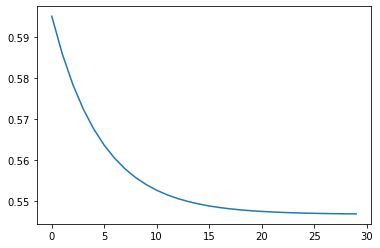

In [4]:
loss_arr = []
for i in range(30):
    output, cache = mod2.forward(data_input, mode='train')
    loss, d_loss = mod2.loss(output, data_target, reg)
    # print("Loss is {:.3f}".format(loss.item()))
    loss_arr.append(loss.item())
    d_output, d_params = mod2.backward(d_loss, cache)
    mod2.update_params(d_params, lr, reg)
    
output, _ = mod2.forward(data_input, mode='test')
print("accuracy on training set is", torch.mean(1.0*((output>0.5)==data_target)).item())
plt.plot(loss_arr)
plt.show()

In [37]:
nb=64
data_input = torch.rand(nb, 2, dtype=dtype, device=device)*2-1
data_target = (torch.norm(data_input, dim=1, keepdim=True)<math.sqrt(2/3.1415926))*1
print("Input size:", data_input.size(), " target size:", data_target.size())
lr = 7e-4
reg = 0.0

Input size: torch.Size([64, 2])  target size: torch.Size([64, 1])


In [40]:
mod3 = Module(layer_type='Sequential', 
              dtype=dtype, device=device)
mod3.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(2, 100), 
              dtype=dtype, device=device))
mod3.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(100, 50), 
              dtype=dtype, device=device))
mod3.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(50, 20), 
              dtype=dtype, device=device))
mod3.append(Module(layer_type='Linear', 
              if_batchnorm=False, 
              activation_type='relu', 
              params_shape=(20, 1), 
              dtype=dtype, device=device))

self.params_shape is  (2, 100) , format (dim_in, dim_out)
self.params_shape is  (100, 50) , format (dim_in, dim_out)
self.params_shape is  (50, 20) , format (dim_in, dim_out)
self.params_shape is  (20, 1) , format (dim_in, dim_out)


torch.Size([64, 100])
torch.Size([64, 50])
torch.Size([64, 20])
accuracy on training set is 0.875


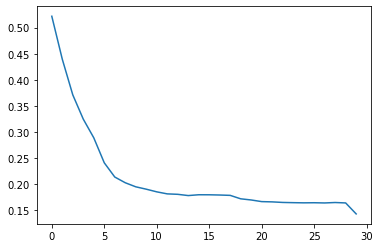

In [41]:
loss_arr = []
for i in range(30):
    output, cache = mod3.forward(data_input, mode='train')
    loss, d_loss = mod3.loss(output, data_target, reg)
    # print("Loss is {:.3f}".format(loss.item()))
    loss_arr.append(loss.item())
    d_input, d_params = mod3.backward(d_loss, cache)
    # print(d_params)
    mod3.update_params(d_params, lr, reg)
    
output, _ = mod3.forward(data_input, mode='test')
print("accuracy on training set is", torch.mean(1.0*((output>0.5)==data_target)).item())
plt.plot(loss_arr)
plt.show()